# Lab 4: Deep Learning

This lab is about Deep Learning and it will walk you through a few simple examples that generalize how we approach regression and classification problems.

## Beyond linear models

In the previous lab we encountered two techniques to solve Supervised Learning problems: **linear regression** and **logistic regression**.
These two techniques share many characteristics. For instance, both formulate a hypothesis about the link between features and target, both require a cost function; both depend on parameters; both learn by **finding the combination of parameters that minimizes a given cost over the training set**.

While these techniques work to solve several problems, they also have some limitations.

For example, linear regression doesn't work well when the relationship between features and output is nonlinear, i.e., when we cannot use a straight line or a flat plane to represent it. For example, think of the number of active users of a web product or a social media platform. If the product is successful, the number of new users added each month would grow, resulting in a nonlinear relationship between the number of users and time.

![Active Users Versus Time](./assets/active_users.png)

Similarly, the Logistic Regression is incapable of separating classes that cannot be pulled apart by a flat boundary (a line in 2D, a plane in 3D, a hyperplane if we have more than three features). It happens all the time, and you may hear the term "not linearly separable" to describe two classes that cannot be separated by a straight boundary. We saw an example of this in [the first lab](./01_Getting_Started.ipynb/#Scikit-Learn) when we tried to separate the blue dots from the red crosses.

![Classification with curved boundary](./assets/blue_dots_red_crosses.png)

In general, the boundary between the two classes is rarely linear, especially when dealing with more complex classification problems with thousands of features and many output classes. To extend regression and classification beyond the linear cases, we need to use more complex models. Historically, computer scientists have invented many techniques to extend beyond linear models including models such as Decision Trees, Support Vector Machines, and Naive Bayes. 

Deep Neural Networks bring together a unified framework to tackle all these cases: we can do linear and nonlinear regression, classification, use them to generate new data, and much more!

In this lab, we will introduce a notation for discussing Neural Networks and rewrite linear and logistic regression using this notation. Finally, we work through stacking multiple nodes and create a deep network.

## Neural Network Diagrams

Let's look at a few high-level diagrams looking at a more mathematical definition of what we're doing. If the math looks latin to you (it is), don't worry. These are just the more formal definitions of what we're doing. After this part of the lab, we'll dive right back into code.

For the visual learners out there, this section will help to "chalkboard" the algorithms we're building.

### Linear regression

Let's look at linear regression. We have introduced [linear regression](./03_Machine_Learning.ipynb#Linear-Regression) in Lab 3. As you may remember, it refers to problems where we try to predict a number from a set of input features. Examples are: predicting the price of a house, predicting the number of clicks a page will get or predicting the revenue a business will generate in the future.

As usual, we will refer to the inputs in the problem using the variable `x` and to the outputs using the variable `y`. So, for example, if we are trying to predict the price of a house from its size, `x` will be the size of the house and `y` will be the price. The equation of linear regression is:

\begin{equation}
y = x.w + b
\end{equation}

and we can represent its operation as an Artificial Neural Network like this:

![Linear regression as a neural net](./assets/linear.png)

This network has only one node, the output node, represented by the circle in the diagram. This node is connected to the input feature `x` by a weight `w`. A second edge enters the node carrying the value of the parameter `b`, which we will call **bias**. 

Fantastic! We have a simple way to represent linear operations in a graph. Let's extend the network to multiple input features. We encountered an example of multivariate regression problem in [Exercise 1 of Lab 3](./03_Machine_Learning.ipynb#Exercise-1), where we built a model to predict the price of a house as a function of 3 inputs: the size in square feet ($x_1$), the number of bedrooms ($x_2$) and the age ($x_3$) of the house.
In that case we had 3 input features and the model had 3 weights ($w_1$, $w_2$ and $w_3$) and 1 bias ($b$). We can extend our graph notation very simply to accommodate for this case:

![Multivariate linear regression](./assets/multivariate.png)

The output node here connects to the `N` inputs through `N` weights, and it also connects to a bias parameter. The equation is the same as before:

\begin{equation}
y = X.w + b
\end{equation}

but now $X$ and $w$ are arrays that contain more than one entry, multiplied using a [dot product](https://en.wikipedia.org/wiki/Dot_product). So, what the above equation really means is:

\begin{equation}
y = x_1 w_1 + ... + x_N w_N + b = X.w + b
\end{equation}

We can now visually represent linear regression with as many inputs as we like.

### Logistic regression

Linear regression gives us a linear relationship between the inputs and outputs, but what if we want a non-binary answer instead of a linear one. For instance, what if we want a binary answer, yes/no answer? For example, given a list of passengers on the Titanic, can we predict if a specific person would survive or not? 

Can you think of a way to change our equation so that we can allow for binary output?

The answer here is to use a Logistic Regression. Just before we output the value, we'll use the **sigmoid** function to output a binary value instead of sliding one. As you may remember from [Lab 3](./03_Machine_Learning.ipynb#Logistic-Regression) the Sigmoid function **maps the all real values to the interval [0, 1]**. We can use the sigmoid to assign the output of the node (so far linear) to the range [0, 1]. We will interpret the result as the probability of a binary outcome.

![Neural Network for Logistic Regression](./assets/logistic.png)

> TIP: if you need a refresher about the sigmoid you can check [Lab 3](./03_Machine_Learning.ipynb#Logistic-Regression) as well as this [nice article on Wikipedia](https://en.wikipedia.org/wiki/Sigmoid_function).

### Perceptron

Adding a sigmoid function is just a special case of what is called an **activation function**. [**Activation Function**](https://en.wikipedia.org/wiki/Activation_function) is just a fancy name we give to the function that sits at the output of a node in a Neural Network. There are many different types of activation functions, and we will encounter them later in this lab. For now, know that they are important. For example, we can describe the first Neural Network invented by a diagram similar to that of the Logistic Regression with just a different activation function. This network is called [**Perceptron**](https://en.wikipedia.org/wiki/Perceptron).

![Perceptron](./assets/perceptron.png)

The Perceptron is also a binary classifier, but instead of using a smooth _sigmoid_ activation function, it uses the _step function_:

\begin{equation}
y = \begin{cases}
1 & {\text{if }} w.x + b > 0 \\
0 & {\text{otherwise}}
\end{cases}
\end{equation}

We could even simplify our diagram notation without losing information by including the bias and the activation symbols in the node itself, like this:

![A more compact notation](./assets/perceptron_compact.png)

Before we move on, let's review each element in the diagram with an example. Let's say our goal is to build a model that predicts if a banknote is fake or real based on some of its properties (we'll do this later in the labs).

First, let's define our **inputs** and **outputs**.

The inputs are the properties of the banknote we plan to use. These could be length, height, thickness, transparency, and more elaborate properties extracted from their images. These input properties are their **features**.

The output is the prediction value, True or False, 0 or 1, that we hope our model to give us to tell us if the note is real or not.

 The graph connecting inputs to output is the **architecture** of our network. In the simple network above the graph contains a single node performing a weighted sum of the input features.

Weights and biases are the parameters of the model. These parameters are the things we have control over (in the beginning). These are _what_ the machine learns in our Machine Learning algorithm. They are the knobs that can be turned to change the model predictions.

During training, the network will attempt to find the best values for weights and biases, but the inputs $x_1,...,x_n$, the outputs, and the network architecture, are given and cannot be changed by the model (or us, for that matter).

Now that we have established a symbolic notation that allows us to describe both linear regression and logistic regression in a very compact and visual way let's see how we can expand the networks.

### Deeper Networks

The above simple networks take multiple inputs and calculate each of their outputs as a weighted sum of the inputs plus a few other things to define a classification model (to make sure numbers make sense -- yes, we can do that). The other _things_ we add to each of the inputs of our model is a fixed _bias_ (usually just some small number that makes sense the input isn't zero) and an optional nonlinear activation function for the classification models.

The weighted sum of the input plus the bias is sometimes also called a _linear combination_ of the input features because it only involves sums and multiplications by parameters (no additional functions like exponentials, cosines or similar).

Let's see what happens when we combine several Perceptrons in the same graph. 

We start by taking many of them, each connected by different weights to the same input nodes. We then calculate the output for each of the nodes, obtaining different predictions, one for each of the Perceptrons. This is called a **fully connected layer**, sometimes called a **dense layer**.

A dense layer contains many identical nodes connected to the same inputs through independent weights, all operating in parallel.

Nothing prevents us from using the output values of the dense layer as features (or inputs) for even more Perceptrons. In other words, we can create a deeper **fully connected Neural Network** by stacking fully connected layers on top of each other. 

![Multilayer Perceptron (MLP)](./assets/multilayer_perceptron.png)

These **fully connected layers** are the root of Deep Learning and are used all the time.

To recap, we organize Perceptrons with the same inputs in layers, i.e., groups of Perceptrons that receive the same inputs. As we will see later, creating a fully connected network in Keras is very easy, it's just a matter of adding more layers.

#### Maths of the Forward Pass

We can think of a Neural Network as a function ($F$), that takes an input value from the feature space and outputs a value in the target space. This calculation, called **Forward Pass** is a composition of linear and nonlinear steps. 

For the math inclined reader, let's look at how we can write the operations performed by a node in the first layer. Each node in the first layer performs a linear transformation of the input features. Mathematically speaking, it calculates a weighted average of the inputs and then adds a bias. 

If we use the index $k$ to enumerate the nodes in the first layer, we can write the weighted sum $z^{(1)}$ calculated by that node as:

\begin{equation}
z^{(1)}_k = x_1 w^{(1)}_{1k} + x_2 w^{(1)}_{2k} + ... + b^{(1)}_k \text{  for every node } k \text{  in the first layer.}
\end{equation}

where we have used the superscript $(1)$ to indicate that the weights belong to the first layer, and the subscript $jk$ to identify the weight multiplying the input feature at position $j$ for the node at position $k$.

In the previous example of the price prediction for a house, the index $j$ runs over the features, so $j=1$ locates the first feature (the size of the house in square feet ($x_1$)), $j=2$ the second feature, and so on. 

If we consider all the input features as a vector $X = [x_1, x_2, x_3, ....]$ and all the output sums of the first layer as a [vector](https://en.wikipedia.org/wiki/Vector_space) $Z^{(1)} = [z^{(1)}_1, z^{(1)}_2, z^{(1)}_3, ...]$, the above weighted sum can be written as a [matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication) of the weight matrix $W^{(1)}$ with the input features:

> TIP: if you are not familiar with vectors, matrices, and linear algebra you can keep going and ignore this mathematical part. There is a more in-depth discussion of these concepts in the next lab. That said, linear algebra is a fundamental component of how Machine Learning and Deep Learning work. So if you are completely foreign to these notions, you may find it valuable to take a class or two on Youtube about vectors, matrices, and their operations.

\begin{equation}
Z^{(1)} = X.W^{(1)} + B^{(1)}  = {\sum_j x_j w^{(1)}_{jk} + b^{(1)}_k} 
\end{equation}

where we arrange the weights in a matrix $W^{(1)}$ whose rows run along the input features and whose columns run along the nodes in the layer.

The nonlinear activation function will be applied to the weighted sum to yield the activation at the output. For example, in the case of the Perceptron, we will apply the step function like this:

\begin{equation}
A^{(1)} = \text{H}(Z^{(1)})
\end{equation}

The activation vector $A^{(1)}$, is a vector of length $k$, and it becomes the input vector to the second layer in the network. The second layer will take the output of the first and perform the exact same calculation:

\begin{equation}
A^{(2)} = \text{H}(A^{(1)}.W^{(2)} + B^{(2)})
\end{equation}

yielding a new activation vector $A^{(2)}$ with as many elements as the number of nodes in the second layer.

This is true for any of the layers: a layer takes the output of the previous layer and performs a linear combination, followed by a nonlinear function. The nonlinear activation function is the most important part of the transformation. If that were not present, a deep network would produce the same result as a shallow network, and it wouldn't be powerful at all.

## Activation functions

We've looked at two nonlinear activation functions already:

* the step function
* sigmoid

These functions are applied to the output weighted sum calculated by a layer before we pass the values onto the next layer or to output. They are the key element of Neural Networks. **Activation functions are what make Neural Networks so versatile and powerful**! Besides sigmoid and step functions there are other powerful options. Let's look at a few more. First let's load our common files:

In [1]:
with open('common.py') as fin:
    exec(fin.read())

In [2]:
with open('matplotlibconf.py') as fin:
    exec(fin.read())

Sigmoid and Step functions are easy to define using `numpy` (using their mathematical formulas):

In [3]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def step(x):
    return x > 0

They both map the real axis onto the interval between 0 and 1 ($[0, 1]$), i.e. they are bounded:

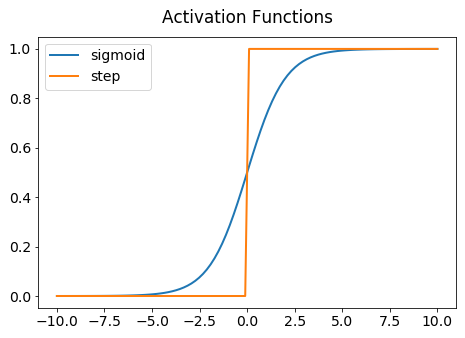

In [4]:
x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x))
plt.plot(x, step(x))
plt.legend(['sigmoid', 'step'])
plt.title('Activation Functions');

They are designed to squeeze a large output sum to 1 while taking a really negative output that sums to 0.

It's as if each node was performing an independent classification of the input features and feeding the output binary outcome onto the next layer.

Besides the `sigmoid` and `step`, other nonlinear activation functions are possible and will be used in this labs. Let's look at a few of them:

### Tanh

The [hyperbolic tangent](https://en.wikipedia.org/wiki/Hyperbolic_function) has a very similar shape to the sigmoid, but it is bounded and smoothly varying between $[-1, +1]$ instead of $[0, 1]$, and is defined as:

\begin{equation}
y = tanh(x) = \frac{e^x-e^{-x}}{e^x+e^{-x}}
\end{equation}

The advantage of this is that negative values of the weighted sum are not forgotten by setting them to zero, but are given a negative weight. In practice `tanh` makes the network learn much faster than `sigmoid` or `step`.

We can write the `tanh` function simply in Python as well, but we don't have to. An efficient version of the `tanh` function is available through numpy:

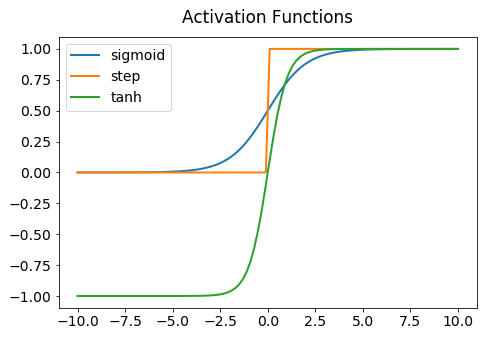

In [5]:
x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x))
plt.plot(x, step(x))
plt.plot(x, np.tanh(x))
plt.legend(['sigmoid', 'step', 'tanh'])
plt.title('Activation Functions');

### ReLU

The [rectified linear unit](https://en.wikipedia.org/wiki/Rectifier_%28neural_networks%29) function or simply *rectifier* is defined as:

\begin{equation}
y = \begin{cases}
x & {\text{if }} x > 0 \\
0 & {\text{otherwise}}
\end{cases}
\end{equation}

or simply:

\begin{equation}
y = \max(0, x)
\end{equation}

Initially motivated from biology, it has been shown to be very effective, and it is probably the most popular activation function for Deep Neural Networks. It offers two advantages.

1. If it's implemented as an `if statement` (the former of the two formulations above), it's calculation is very fast, much faster than smooth functions like `sigmoid` and `tanh`. 
2. Not being bounded on the positive axis, it can distinguish between two large values of input sum, which helps back-propagation converge faster.

In [6]:
def relu(x):
    cond = x > 0
    return cond * x

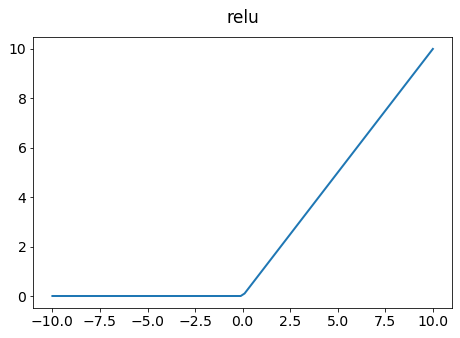

In [7]:
x = np.linspace(-10, 10, 100)
plt.plot(x, relu(x))
plt.title('relu');

### Softplus

The [Softplus](https://en.wikipedia.org/wiki/Rectifier_%28neural_networks%29) function is a smooth approximation of the `ReLU`:

\begin{equation}
y = \log(1 + e^x)
\end{equation}

We mention it for completeness, though it's rarely used in practice.

In [8]:
def softplus(x):
    return np.log1p(np.exp(x))

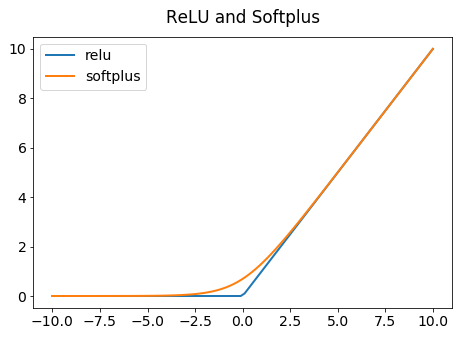

In [9]:
x = np.linspace(-10, 10, 100)
plt.plot(x, relu(x))
plt.plot(x, softplus(x))
plt.legend(['relu', 'softplus'])
plt.title('ReLU and Softplus');

### SeLU

Finally, the SeLU activation function is a very recent development ([see paper published in June 2017](https://arxiv.org/abs/1706.02515)). The name stands for **scaled exponential linear unit** and it's implemented as:

\begin{equation}
y = \lambda \begin{cases}
x & {\text{if }} x > 0 \\
\alpha (e^x - 1) & {\text{otherwise}}
\end{cases}
\end{equation}

On the positive axis it behaves like the rectified linear unit (`ReLU`), scaled by a factor $\lambda$. On the negative axis it smoothly goes down to a negative value. This activation function, combined with a new regularization technique called **Alpha Dropout**, offers better convergence properties than `ReLU`!

In [10]:
def selu(x):
    alpha = 1.6732632423543772848170429916717
    scale = 1.0507009873554804934193349852946
    res = scale * np.where(x>0.0,
                           x,
                           alpha * (np.exp(x) - 1))
    return res

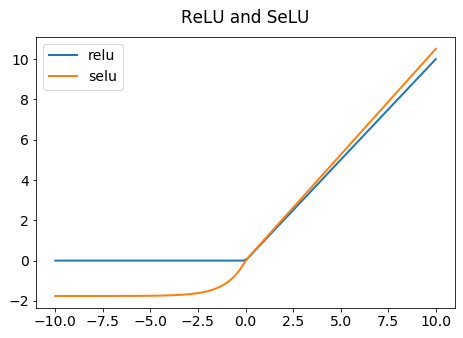

In [11]:
x = np.linspace(-10, 10, 100)
plt.plot(x, relu(x))
plt.plot(x, selu(x))
plt.legend(['relu', 'selu'])
plt.title('ReLU and SeLU');

When creating a deep network, we will use one of these activation functions _between_ one layer and the next, in order to make the Neural Network nonlinear. These functions are the secret power of Neural Networks: with nonlinearities at each layer they are able to approximate very complex functions.

## Binary classification

Let's work through classifying a binary dataset using a Neural Network. We'll need a dataset to work with to train our Neural Network. Let's create an example dataset with two classes that are not separable with a straight boundary, and let's separate them with a fully connected Neural Network. First we import the `make_moons` function from Scikit Learn:

In [12]:
from sklearn.datasets import make_moons

And then we use it to generate a synthetic dataset with 1000 points and 2 classes:

In [13]:
X, y = make_moons(n_samples=1000,
                  noise=0.1,
                  random_state=0)

Let's plot this dataset and see what it looks like:

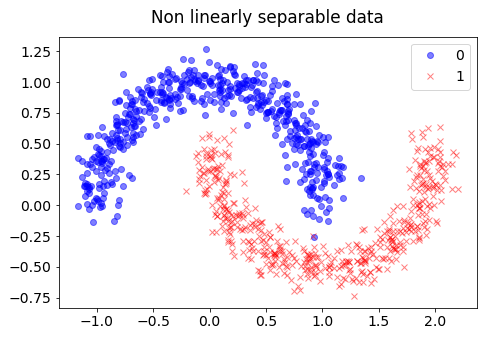

In [14]:
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])

plt.title('Non linearly separable data');

In [16]:
X.shape

(1000, 2)

We split the data into training and test sets:

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=42)

To build our Neural Network, let's import a few libraries from the Keras package:

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

### Logistic Regression

Let's first verify that a shallow model cannot separate the two classes. This is more for educational purposes than anything else. We are going to build a model that we know is wrong, since it can only draw straight boundaries. This model will not be able to separate our data correctly but we will then be able to extend it and see the power of Neural Networks.

Let's start by building a [Logistic Regression model](./03_Machine_Learning.ipynb#Logistic-regression-in-Keras) like we did in the previous lab. We will create it using the `Sequential` API, which is the simpler way to build models in Keras. We add a single `Dense` layer with 2 inputs, a single node and a `sigmoid` activation function:

In [22]:
model = Sequential()

Now we'll add a single [`Dense` layer](./03_Machine_Learning.ipynb#Linear-Regression-with-Keras) with 2 inputs and we'll use the `sigmoid` activation function here.

In [23]:
model.add(Dense(1, input_dim=2, activation='sigmoid'))

The arguments of the `Dense` layer definition map really well to our graph notation above

![Dense layer in Keras](./assets/dense.png)

Then we compile the model assigning the optimizer, the loss and any additional metric we would like to include (like the accuracy in this case):

In [25]:
model.compile(Adam(lr=0.05),
              'binary_crossentropy',
              metrics=['accuracy'])

Let's look at the three arguments to make sure we understand them.

- `Adam(lr=0.05)` is the `optimizer`, this is the algorithm that performs the actual learning. There are many different optimizers, and we will explore them in detail in the next lab. For now, know that `Adam` is an excellent one.

- `binary_crossentropy` is the **loss** or **cost function**. We have described it in detail in [Lab 3](./03_Machine_Learning.ipynb#Cost-function). For binary classification problems where we have a single output with a `sigmoid` activation, we need to use `binary_crossentropy` function. For Multiclass classifications where we have multiple classes with a `softmax` activation, we need to use `categorical_crossentropy`, as we'll see below.

- `metrics` is just a list of additional metrics we'd like to calculate, in this case, we add the `accuracy` of our classification, i.e., the fraction of correct predictions as seen in [Lab 3](./03_Machine_Learning.ipynb#Accuracy).

As we have seen in the [previous lab](./03_Machine_Learning.ipynb#Linear-Regression-with-Keras), we can now train the compiled model using our training data. The `model.fit(X, y)` method does just that: it uses the training inputs `X_train` to generate predictions. It then compares the predictions with the actual labels `y_train` through the use of the cost function, and it finally adapts the parameters to minimize such cost.

We will train our model for 200 epochs, which means our model will get to see our training data 200 times. We also set `verbose=0` to suppress printing during the training. Feel free to change it to `verbose=1` or `verbose=2` if you want to monitor training as it progresses.

In [26]:
model.fit(X_train, y_train, epochs=200, verbose=0);

Now that we have trained our model, we can evaluate its performance on the test data using the function `.evaluate`. This takes the input features of the test data `X_test` and the input labels of the test data `y_test` and calculates the average loss and any other metric added during `model.compile`. In the present case `.evaluate` will return two numbers, the loss (cost) and the accuracy:

In [27]:
results = model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 160us/sample - loss: 0.3171 - accuracy: 0.8367


We can print out the accuracy by retrieving the second element in the `results` tuple:

In [28]:
print("The Accuracy score on the Test set is:\t",
      "{:0.3f}".format(results[1]))

The Accuracy score on the Test set is:	 0.837


The accuracy is better than random guessing, but it's not 100%. Let's see the boundary identified by the logistic regression by plotting the boundary as a line:

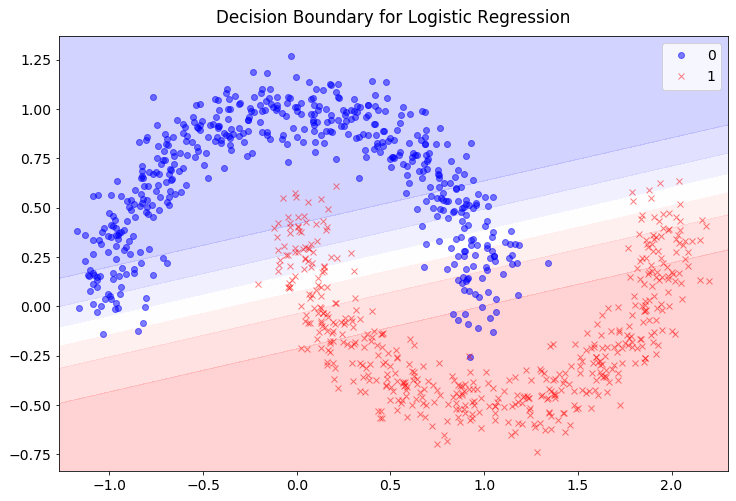

In [29]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model, X, y)

plt.title("Decision Boundary for Logistic Regression");

As you can see in the figure, since a shallow model like logistic regression is not able to draw curved boundaries, the best it can do is align the boundary so that most of the blue dots fall in the blue region and most of the red crosses fall in the red region.

### Deep model

The word **deep** in Deep Learning has changed meaning over time. Initially, it was used to refer to networks that had more than a single layer. As the field progressed, and researchers designed models with many inner layers, the word shifted to meaning networks with hundreds of layers and billions of parameters. In this labs, we will use the original meaning and call "deep" any model with more than one layer, so let's add a few layers and create our first "deep" model.

Let's build a model with the following structure:

![Graph of our network](./assets/deep.png)

This model has three layers. The first layer has four nodes, with two inputs and a `relu` activation function. Each of the two nodes in the second layer receives the four values at the output of the first layer, performs a weighted average and then pipes the output through a `relu` activation function. Finally, the two outputs of this layer go into the third layer, which is also our output layer. This only has one node and a `sigmoid` activation function, so that the output values are constrained between 0 and 1.

We can build this network in Keras very easily. All we have to do is `add` more layers to the `Sequential` model, specifying the number of nodes and the activation for each of them using the `.add()` function. Let's start with the first layer:

In [30]:
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))

This is very similar to what we did above, except that now this `Dense` layer has four nodes instead of one. How many parameters are there in this layer? There are twelve parameters, two weights for each of the nodes (2*4) plus one bias for each of the nodes (4).

Let's now add a second layer after the first one, with two nodes:

In [31]:
model.add(Dense(2, activation='relu'))

Notice that we didn't have to specify the `input_dim` parameter because Keras is smart and automatically matches it with the output size of the previous layer.

Finally, let's add the output layer:

In [32]:
model.add(Dense(1, activation='sigmoid'))

and let's compile the model:

In [33]:
model.compile(Adam(lr=0.05),
              'binary_crossentropy',
              metrics=['accuracy'])

The `input_dim` parameter is the number of dimensions in our input data points. In this case, each point is described by two numbers, so the input dimension is equal to 2 (for the first `Dense()` layer). `Dense(1)` is the output layer. Here we are classifying 2 classes, blue dots and red crosses, and therefore it's a binary classification and we are predicting a single number: the probability of being in the class of the red crosses.

Let's train it and see how it performs, using the `.fit()` method again:

In [34]:
model.fit(X_train, y_train, epochs=100, verbose=0);

We'll use a couple handy functions from the `sklearn.metrics` package, the `accuracy_score()` and `confusion_matrix()` functions. First of all let's see what classes our model predicts using the `.predict_classes()` method:

In [35]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

This is different from the `.predict()` method because it returns the actual predicted class instead of the predicted probability of each class.


In [36]:
y_train_prob = model.predict(X_train)
y_test_prob = model.predict(X_test)

Let's look at the first few values for comparison:

In [37]:
y_train_pred[:3]

array([[0],
       [0],
       [0]])

In [38]:
y_train_prob[:3]

array([[0.46727392],
       [0.46727392],
       [0.46727392]], dtype=float32)

Let's compare the predicted classes with the actual classes on both the training and the test set. First, let's import the `accuracy_score` and the `confusion_matrix` methods from `sklearn`:

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Let's check out the score accuracy here for both the training set and the test set:

In [40]:
acc = accuracy_score(y_train, y_train_pred)
print("Accuracy (Train set):\t{:0.3f}".format(acc))

acc = accuracy_score(y_test, y_test_pred)
print("Accuracy (Test set):\t{:0.3f}".format(acc))

Accuracy (Train set):	0.519
Accuracy (Test set):	0.457


Let's plot the decision boundary for the model:

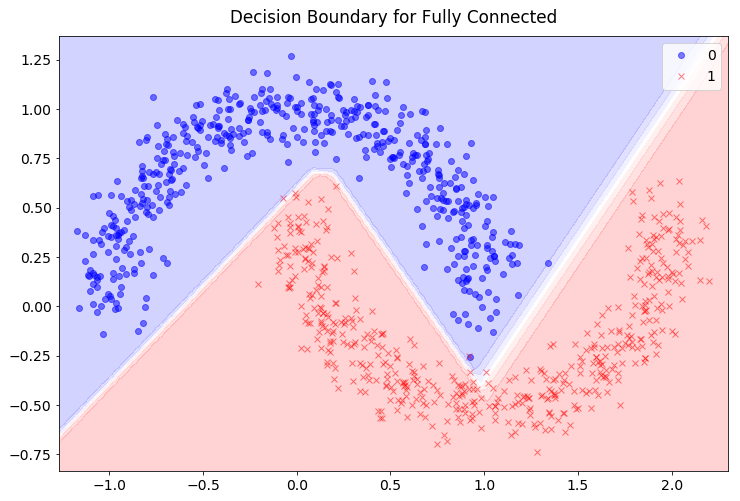

In [37]:
plot_decision_boundary(model, X, y)
plt.title("Decision Boundary for Fully Connected");

As you can see, our network learned to separate the two classes with a zig-zag boundary, which is typical of the `ReLU` activation.

> TIP: if your the model has not learned to separate the data well, re-initialize the model and re-train it. As you'll see later in this labs, the random initialization of the model may have a significant effect on its ability to effectively learn.

Let's try building our model again, but use a different activation this time. If we used the `tanh` function instead, we'd have obtained a smoother boundary:

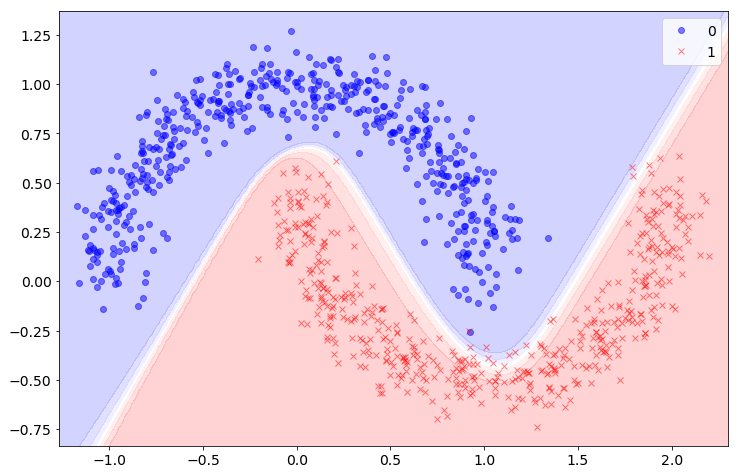

In [38]:
model = Sequential()
model.add(Dense(4, input_dim=2, activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.05),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, verbose=0)

plot_decision_boundary(model, X, y)

In [39]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

In [40]:
acc = accuracy_score(y_train, y_train_pred)
print("Accuracy (Train set):\t{:0.3f}".format(acc))

acc = accuracy_score(y_test, y_test_pred)
print("Accuracy (Test set):\t{:0.3f}".format(acc))

Accuracy (Train set):	0.990
Accuracy (Test set):	0.987


Adding depth to our model allows us to separate two classes with a boundary of any shape needed. The complexity of the boundary is determined by the number of nodes and layers. The more we add, the more parameters our network will learn. Since we can always add more layers,  we can always increase the complexity of a network, and therefore, of the boundary it can learn.

Deep Learning models can have as little as few hundred parameters to as much as a few billions. As the number of parameters increases, so will the need for data.  To train a model with millions of parameters, we will likely need tens of millions of data points, which will also imply considerable computational resources as we shall see later on.

## Multiclass classification

Neural Networks easily extend to cases where the output is not a single value. 

In the case of regression, this means that the output is a vector, while in the case of classification, it means we have more than one class we'd like to separate.

For example, if we are doing image recognition, we may have several classes for all the objects we'd like to distinguish (e.g., cat, dog, mouse, bird). Instead of having a single output Yes/No, we allow the network to predict multiple values.

Similarly, for a self-driving car, we may want our network to predict the direction of the trajectory the vehicle should take, which means both the speed and the steering angle. This would be a regression with multiple outputs at the same time. The extension is trivial in the case of regression: we add as many output nodes as needed and minimize the mean squared error on the whole vector output.

The case of classification requires a little more discussion because we need to choose the activation function carefully. When we are predicting discrete output we could be in one of two cases: 

1. the classes could be mutually exclusive
2. each class could be independent

Let's consider the example of email classification. We want to use our Machine Learning model to organize a large pool of emails sitting in our inbox. We could choose two way to organize them.

### Tags

One way to arrange our emails would be to add tags to each email to specify the content. We could have a tag for `Work`, a tag for `Personal`, but also a tag for `Has_Picture` or `Has_Attachment`. These tags are not mutually exclusive. Each one is independent of the others, and a single email could carry multiple tags.

The extension of the Neural Network to this case is also pretty straightforward because we will perform an independent logistic regression on each tag. Like in the case of the regression, all we have to do is add multiple sigmoid output nodes, and we are done.

### Mutually exclusive classes and Softmax

A different case is if we decided to arrange our emails in folders, for example: `Work`, `Personal`, `Spam`, and move each email to the corresponding folder. In this case, each email can only be in one folder. If it's in folder `Work`, it is automatically not in folder `Personal`. In this case, we cannot use independent sigmoids; we need to use an activation function that will normalize the output so that if a node predicts a high probability, all the others will predict a low probability and the sum of all the probabilities will add up to one.

Mathematically, the `softmax` function is a generalization of the logistic function that does just that:

\begin{equation}
\sigma (\mathbf {z} )_{j}={\frac {e^{z_{j}}}{\sum _{k=1}^{K}e^{z_{k}}}}    \text{ for j = 1, …, K.}
\end{equation}

When we deal with mutually exclusive classes, we always have to apply the `softmax` function to the last layer.

### The Iris dataset

The Iris dataset is a classic dataset used in Machine Learning. It describes three species of flowers, with four features each, so it's a great example of a Multiclass classification. Let's see how Multiclass classification's done using Keras and the Iris dataset. First of all, let's load the data.

In [41]:
df = pd.read_csv('../data/iris.csv')

In [42]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We need to do a bit of massaging of the data, separate the input features from the target column containing the species.

First of all let's create a feature matrix $X$ where we store the first 4 columns:

In [43]:
X = df.drop('species', axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Let's also create a target column, where we encode the labels in alphabetical order. We need to do this because Machine Learning models do not understand string values like `setosa` or `versicolor`. We will first look at the unique values contained in the `species` column:

In [44]:
targets = df['species'].unique()
targets

array(['setosa', 'versicolor', 'virginica'], dtype=object)

And then build a dictionary where we assign an index to each target name in alphabetical order:

In [45]:
target_dict = {n:i for i, n in enumerate(targets)}
target_dict

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

Now we can use the `.map` method to create a new Series from the `species` column, where each of the entries is replaced using `targed_dict`:

In [46]:
y= df['species'].map(target_dict)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

Now `y` is a number indicating the class (0, 1, 2). In order to use this with Neural Networks, we need to perform one last step: we will expand it it to 3 binary dummy columns. We could use the `pandas.get_dummies` function to do this, but Keras also offers an equivalent function, so let's use that instead:

In [47]:
from tensorflow.keras.utils import to_categorical

In [48]:
y_cat = to_categorical(y)

Let's check out what the data looks like by looking at the first 5 values:

In [49]:
y_cat[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

Now we create a train and test split, with 20% test size. We'll pass the values of the `X` dataframe because Keras doesn't like pandas dataframes. Also notice that we introduce 2 more parameters:

- `stratify = True` to make sure that we preserve the ratio of labels in each set, i.e. we want each set to be composed of one third of each flower type.
- `random_state = 0` sets the seed of the random number generator in a way that we all get the same results.

In [50]:
X_train, X_test, y_train, y_test = \
    train_test_split(X.values, y_cat, test_size=0.2,
                     random_state=0, stratify=y)

and then create a model with:

* 4 features in input (the `sepal_length`, `sepal_width`, `petal_length`, `petal_width`)
* 3 in output (each one being the probability of the flower being one of `setosa`, `versicolor`, `virginica`) 
* A `softmax` activation

This is a shallow model, equivalent of a Logistic Regression with 3 classes instead of two.

In [51]:
model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
model.compile(Adam(lr=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
model.fit(X_train, y_train,
          validation_split=0.1,
          epochs=30, verbose=0);

The output of the model is a matrix with 3 columns, corresponding to the predicted probabilities for each class where each of the 3 output predictions are listed in the columns, ordered by their order in the `y_train` array:

In [53]:
y_pred = model.predict(X_test)
y_pred

array([[9.8827237e-01, 1.1724943e-02, 2.7269275e-06],
       [7.7205286e-03, 7.2083211e-01, 2.7144733e-01],
       [9.4516259e-01, 5.4778002e-02, 5.9427082e-05],
       [4.8651593e-04, 4.0913874e-01, 5.9037471e-01],
       [9.7515690e-01, 2.4831427e-02, 1.1651275e-05],
       [8.5418820e-03, 7.3927188e-01, 2.5218618e-01],
       [3.4440920e-04, 2.5851279e-01, 7.4114275e-01],
       [9.6473068e-01, 3.5242010e-02, 2.7363711e-05],
       [9.5373839e-01, 4.6218578e-02, 4.3020955e-05],
       [4.8771027e-02, 8.7183797e-01, 7.9390951e-02],
       [2.0679845e-05, 6.3216850e-02, 9.3676251e-01],
       [2.0426000e-02, 7.9778111e-01, 1.8179281e-01],
       [7.5534033e-03, 7.3590100e-01, 2.5654566e-01],
       [2.6228256e-04, 2.4352013e-01, 7.5621754e-01],
       [3.8020689e-02, 8.8206136e-01, 7.9917893e-02],
       [1.6367546e-04, 1.7993905e-01, 8.1989729e-01],
       [8.7118875e-05, 1.2766066e-01, 8.7225217e-01],
       [2.4450323e-02, 8.5722160e-01, 1.1832802e-01],
       [1.9017529e-02, 8.622

Which class does our network think each flower is? We can obtain the predicted class with the `np.argmax`, which finds the index of the maximum value in an array:

In [54]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

Let's check the classification report and confusion matrix that we have described in [Lab 3](./03_Machine_Learning.ipynb#Confusion-Matrix)

As you may remember `classification_report()` is found in `sklearn.metrics` package:

In [55]:
from sklearn.metrics import classification_report

To create a classification report, we'll run the `classification_report()` method, passing it the test class (the list that we created before of the _correct_ labels for each dataum) and the `y_pred_class` (the list we just obtained of the predicted classes).

In [56]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

   micro avg       0.97      0.97      0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



We get the confusion matrix by running the `confusion_matrix()` method passing it the same arguments as the classification report:

In [57]:
cm = confusion_matrix(y_test_class, y_pred_class)

pd.DataFrame(cm, index = targets,
             columns = ['pred_'+c for c in targets])

,pred_setosa,pred_versicolor,pred_virginica
setosa,10,0,0
versicolor,0,10,0
virginica,0,1,9


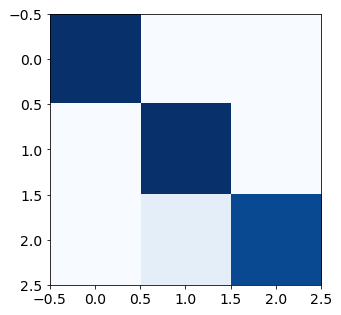

In [58]:
plt.imshow(cm, cmap='Blues');

Recall that the confusion matrix tells us how many examples from one class are predicted in each class. It's almost perfect, with the exception of one point in class `virginica` which gets predicted in class `versicolor`. Let's inspect the data visually to check why. Our data has 4 features, so we need to decide how to plot it. We could choose 2 features and plot just those:

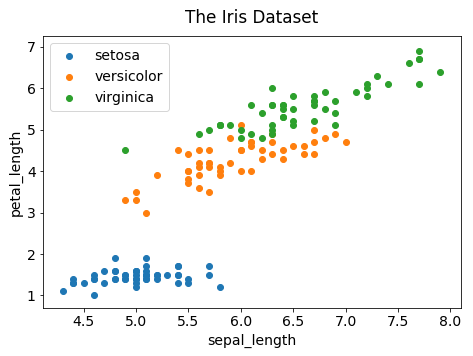

In [59]:
plt.scatter(X.loc[y==0,'sepal_length'],
            X.loc[y==0,'petal_length'])

plt.scatter(X.loc[y==1,'sepal_length'],
            X.loc[y==1,'petal_length'])

plt.scatter(X.loc[y==2,'sepal_length'],
            X.loc[y==2,'petal_length'])

plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend(targets)
plt.title("The Iris Dataset");

Classes  `virginica` and `versicolor` are slightly overlapping, which could explain why our model couldn't separate them too well. Is it true for every feature? We'll check that with a very cool visualization library called **Seaborn**. [Seaborn](https://seaborn.pydata.org/) improves Matplotlib with additional plots, for example the `pairplot`, which plots all possible pairs of features in a scatter plot:

In [60]:
import seaborn as sns

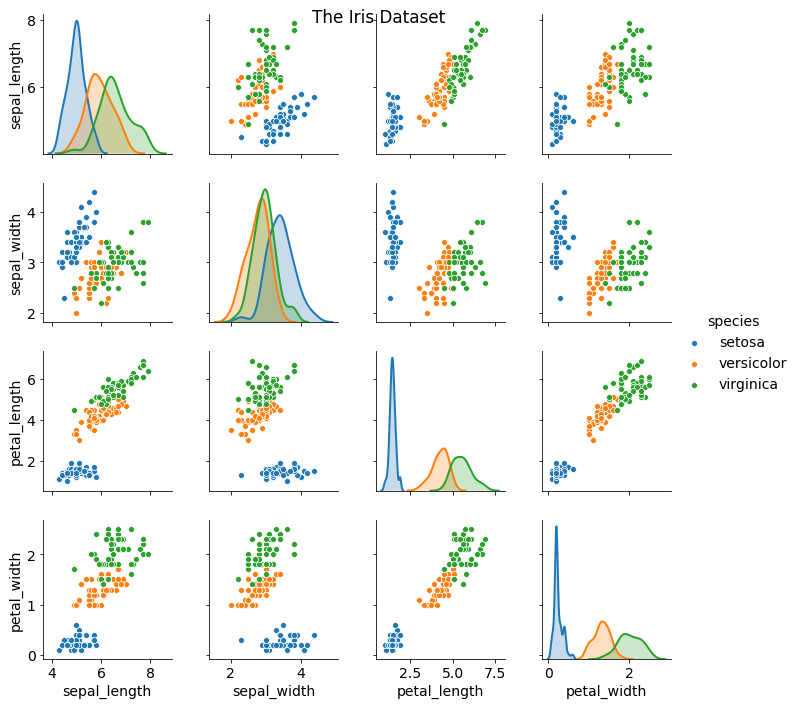

In [61]:
g = sns.pairplot(df, hue="species")
g.fig.suptitle("The Iris Dataset");

As you can see `virginica` and `versicolor` overlap in all the features, which can explain why our model confuses them. Keep in mind that we used a shallow model to separate them instead of a deeper one.

## Conclusion

In this lab we have introduced fully connected deep Neural Networks and seen how they can be used to solve linear and nonlinear regression and classification problems. In the exercises we will apply them to predict the onset of diabetes in a population.

## Exercises

### Exercise 1

The [Pima Indians dataset](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) is a very famous dataset distributed by UCI and originally collected from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains data from clinical exams for women age 21 and above of Pima indian origins. The objective is to predict, based on diagnostic measurements, whether a patient has diabetes.

It has the following features:

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)

The last column is the outcome, and it is a binary variable.

In this first exercise we will explore it through the following steps:

1. Load the ..data/diabetes.csv dataset, use `pandas` to explore the range of each feature
- For each feature draw a histogram. Bonus points if you draw all the histograms in the same figure.
- Explore correlations of features with the outcome column. You can do this in several ways, for example using the `sns.pairplot` we used above or drawing a heatmap of the correlations.
- Do features need standardization? If so what standardization technique will you use? MinMax? Standard?
- Prepare your final `X` and `y` variables to be used by an ML model. Make sure you define your target variable well. Will you need dummy columns?

### Exercise 2

Build a fully connected NN model that predicts diabetes. Follow these steps:

1. split your data in a train/test with a test size of 20% and a `random_state = 22`
- define a sequential model with at least one inner layer. You will have to make choices for the following things:
    - what is the size of the input?
    - how many nodes will you use in each layer?
    - what is the size of the output?
    - what activation functions will you use in the inner layers?
    - what activation function will you use at the output?
    - what loss function will you use?
    - what optimizer will you use?
- fit your model on the training set, using a validation_split of 0.1
- test your trained model on the test data from the train/test split
- check the accuracy score, the confusion matrix and the classification report

### Exercise 3

Compare your work with the results presented in [this notebook](https://www.kaggle.com/futurist/pima-data-visualisation-and-machine-learning). Are your Neural Network results better or worse than the results obtained by traditional Machine Learning techniques?

- Try training a Support Vector Machine or a Random Forest model on the same train/test split. Is the performance better or worse?
- Try restricting your features to only four features like in the suggested notebook. How does model performance change?

### Exercise 4

[Tensorflow playground](http://playground.tensorflow.org/) is a web-based Neural Network demo. It is beneficial to develop an intuition about what happens when you change architecture, activation function or other parameters. Try playing with it for a few minutes. You don't need to understand the meaning of every knob and button in the page, get a sense for what happens if you change something. In the next lab, we'll explore these things in more detail.